In [ ]:
# Utilizamos el Drive en Colab para subir los datos a utilizar
# Se eliminan despues de cierto tiempo al subir directamente
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Librerías
import sys
import os
import  tensorflow as tf
# Para presocesar las imágenes_
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Importamos optimizadores
from tensorflow.python.keras import optimizers
# Librería para hacer redes neuronales scuenciales (capas en orden)
from tensorflow.python.keras.models import Sequential
# 
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
# Capas de convoluciones y Maxpooling
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
# Limpiar
from tensorflow.python.keras import backend as K

In [ ]:
# Cerrar todas las sesiones existentes de Keras
K.clear_session()

# Path de dataset

In [ ]:
# Importar lodos los datos desde el directorio
data_entrenamiento = '/content/drive/MyDrive/data/entrenamiento'
data_validacion = '/content/drive/MyDrive/data/validacion'

# Configuración de parámetros

In [ ]:
# Parámetros

# Número de veces vamos a iterar sobre los datos:
epocas=20
# Definir tamaño para todas la imágenes:
longitud, altura = 150, 150
# Número de imágenes que ingresan al proceso en cada uno de los pasos:
batch_size = 32
# Número de veces que se procesa la información en cada una de las épocas:
pasos = 300
# Se va a evaluar después de cada época con los dats de evaluación
validation_steps = 400
# Número de clases o etiquetas
clases = 6

# Generador de imágenes (entrenamiento y validación)

In [ ]:
# Pre procesamiento de las imagenes

# Normalización
entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validacion_data = ImageDataGenerator(rescale=1. / 255)

#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras
imagen_entrenamiento = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,             # Directorio
    target_size=(altura, longitud), #Tamaño de las imágenes
    batch_size=batch_size,          
    class_mode='categorical')       # Clasificación categorica (etiquetas)

imagen_validación = validacion_data.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

Found 3324 images belonging to 6 classes.
Found 840 images belonging to 6 classes.


# Numero de imagenes de entrenamiento y validación

In [ ]:
nb_train_samples = 3324
nb_validation_samples = 840

# Creación y entrenamiento de modelo CNN

In [ ]:
#Modelo
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), padding ="same", input_shape=(longitud, altura, 3), activation='relu'))  #Capa de convolución
cnn.add(MaxPooling2D(pool_size=(2,2)))    #Maxpooling

cnn.add(Convolution2D(64, 2,2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Archivo plano
cnn.add(Flatten())
# Capas densas
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(clases, activation='softmax'))
#Compilación
cnn.compile(loss='categorical_crossentropy',
            optimizer='Adam',
            metrics=['accuracy'])

In [ ]:
model_history =cnn.fit_generator(
    imagen_entrenamiento,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=imagen_validación,
    validation_steps=validation_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
300/300 [==============================] - 811s 3s/step - loss: 1.5618 - accuracy: 0.3932 - val_loss: 1.2433 - val_accuracy: 0.5396
Epoch 2/20
300/300 [==============================] - 304s 1s/step - loss: 1.2787 - accuracy: 0.5102 - val_loss: 1.1306 - val_accuracy: 0.5731
Epoch 3/20
300/300 [==============================] - 304s 1s/step - loss: 1.1270 - accuracy: 0.5714 - val_loss: 1.1306 - val_accuracy: 0.5995
Epoch 4/20
300/300 [==============================] - 302s 1s/step - loss: 1.0195 - accuracy: 0.6198 - val_loss: 1.1333 - val_accuracy: 0.6231
Epoch 5/20
300/300 [==============================] - 301s 1s/step - loss: 0.9058 - accuracy: 0.6583 - val_loss: 1.2390 - val_accuracy: 0.6069
Epoch 6/20
300/300 [==============================] - 300s 1s/step - loss: 0.8126 - accuracy: 0.7023 - val_loss: 1.0958 - val_accuracy: 0.6350
Epoch 7/20
300/300 [==============================] - 300s 1s/step - loss: 0.7213 - accuracy: 0.7373 - val_loss: 1.2567 - val_accuracy: 0.6309

In [ ]:
# Se guardan en la carpeta "modelo"
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./modelo/modelo.h5')
cnn.save_weights('./modelo/pesos.h5') 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def plotTraining(hist, epochs, typeData):  
  if typeData=="loss":
      plt.figure(1,figsize=(10,5))
      yc=hist.history['loss']
      xc=range(epochs)
      plt.ylabel('Loss', fontsize=24)
      plt.plot(xc,yc,'-r',label='Loss Training')
  if typeData=="accuracy":
      plt.figure(2,figsize=(10,5))
      yc=hist.history['accuracy']
      for i in range(0, len(yc)):
          yc[i]=100*yc[i]
      xc=range(epochs)
      plt.ylabel('Accuracy (%)', fontsize=24)
      plt.plot(xc,yc,'-r',label='Accuracy Training')
  if typeData=="val_loss":
      plt.figure(1,figsize=(10,5))
      yc=hist.history['val_loss']
      xc=range(epochs)
      plt.ylabel('Loss', fontsize=24)
      plt.plot(xc,yc,'--b',label='Loss Validate')
  if typeData=="val_accuracy":
      plt.figure(2,figsize=(10,5))
      yc=hist.history['val_accuracy']
      for i in range(0, len(yc)):
          yc[i]=100*yc[i]
      xc=range(epochs)
      plt.ylabel('Accuracy (%)', fontsize=24)
      plt.plot(xc,yc,'--b',label='Training Validate')


  plt.rc('xtick',labelsize=24)
  plt.rc('ytick',labelsize=24)
  plt.rc('legend', fontsize=18) 
  plt.legend()
  plt.xlabel('Number of Epochs',fontsize=24)
  plt.grid(True)


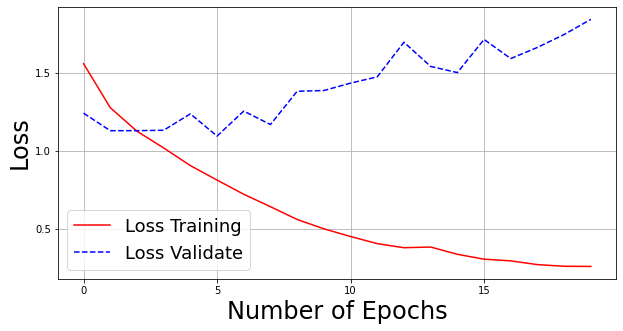

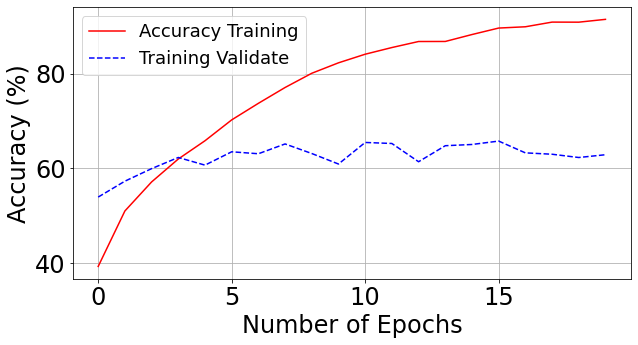

In [ ]:
plotTraining(model_history,20,"loss")
plotTraining(model_history,20,"accuracy")
plotTraining(model_history,20,"val_loss")
plotTraining(model_history,20,"val_accuracy")

# Matriz de confusión y métricas de desempeño

Found 840 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


              precision    recall  f1-score   support

           0     0.2976    0.1786    0.2232       140
           1     0.4396    0.9357    0.5982       140
           2     0.5000    0.6286    0.5570       140
           3     0.8732    0.4429    0.5877       140
           4     0.7826    0.2571    0.3871       140
           5     0.4727    0.5571    0.5115       140

    accuracy                         0.5000       840
   macro avg     0.5610    0.5000    0.4774       840
weighted avg     0.5610    0.5000    0.4774       840



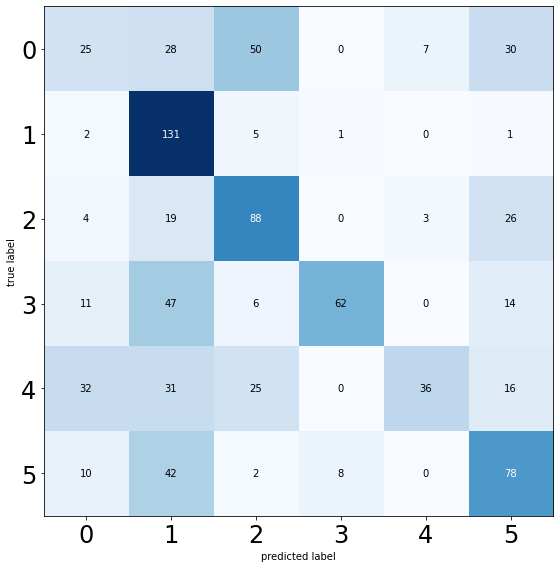

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

names=['Gato', 'Gallina', 'Perro', 'Pex', 'Conejo', 'Araña']
test_data_dir = '/content/drive/MyDrive/data/pruebas'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("./modelo/modelo.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(8,8), show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))

#PREDICCIÓN

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

In [ ]:
longitud, altura = 150, 150
modelo = './modelo/modelo.h5'
pesos_modelo = './modelo/pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)


In [ ]:
def predict(file):
  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("pred: Gato")
  elif answer == 1:
    print("pred: Gallina")
  elif answer == 2:
    print("pred: Perro")
  elif answer == 3:
    print("pred: Pex")
  elif answer == 4:
    print("pred: Conejo")
  elif answer == 5:
    print("pred: Araña")

  return answer


img = '/content/drive/MyDrive/data/pruebas/Ragno/ea37b20c2ff1013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg'
predict(img)

pred: Araña


5